FIND S

In [26]:
def train(con,tar):
    for i, val in enumerate(tar):
        if val.lower()=='yes':
            specific_h=con[i].copy()
            break

    for i, val in enumerate(con):
        if tar[i].lower()=='yes':
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x]='?'
                else:
                    pass
    return specific_h


concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]

target = ['yes', 'yes', 'no', 'yes']

s_final= train(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")

Final Specific_h: 
['Sunny', 'Warm', '?', 'Strong', '?', '?']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CANDIDATE ELIMINATION

In [ ]:
def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)

    # Fix the initialization of general_h
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x] if general_h[x][x] == '?' else general_h[x][x]
                else:
                    general_h[x][x] = '?' if general_h[x][x] == '?' else general_h[x][x]

        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")

    # Clean up the redundant hypotheses in the generic boundary
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h

concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]

target = ['yes', 'yes', 'no', 'yes']

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final Generic_h: ", g_final, sep="\n")


Initialization of specific_h and generic_h

Specific Boundary:  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  2 Instance is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?', '?'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DECISION TREE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 1.0
Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   |

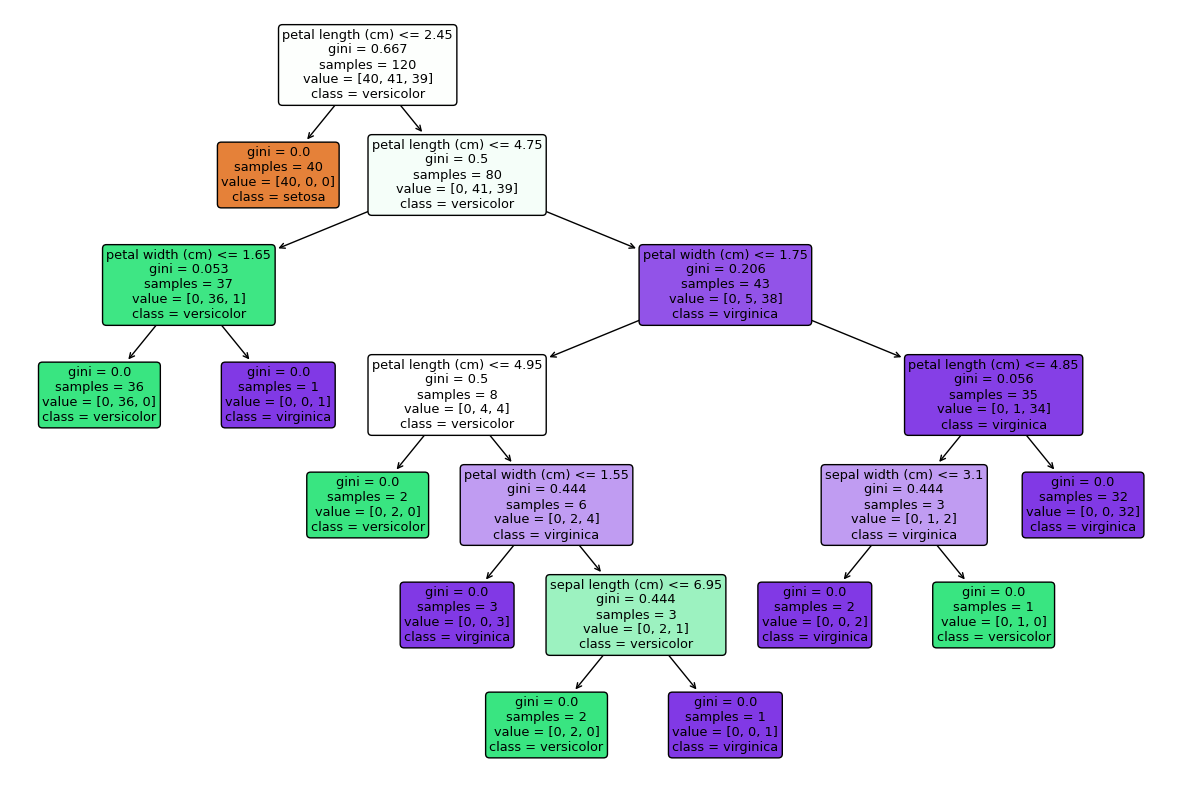

Prediction for new sample: setosa


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Now, you can use the trained classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = clf.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")

SVM

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')  # Use 'linear' kernel for simplicity

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now, you can use the trained SVM classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = svm_classifier.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")

Accuracy: 1.0
Prediction for new sample: setosa


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KNN

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors Classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Print correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    actual_class = iris.target_names[y_test[i]]
    predicted_class = iris.target_names[y_pred[i]]
    if actual_class == predicted_class:
        correct_predictions += 1
    else:
        wrong_predictions += 1
    print(f"Actual: {actual_class}, Predicted: {predicted_class}")

# Print overall accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy}")

# Print number of correct and wrong predictions
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


EM ALGORITHM

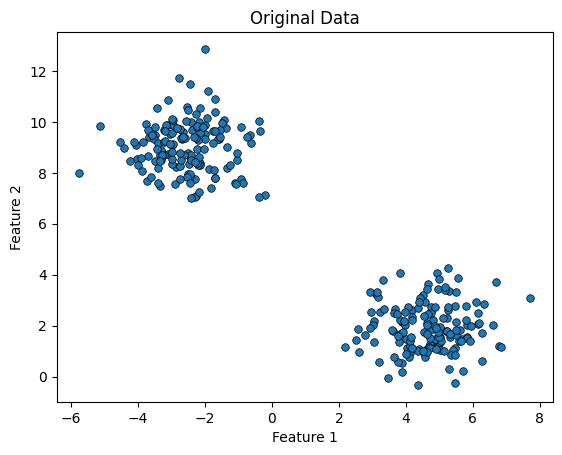

Final means:
[[-2.55143224  9.02835242]
 [ 4.66375945  1.92025297]]

Final covariances:
[[[ 0.93427526 -0.01424697]
  [-0.01424697  0.98747069]]

 [[ 0.97962592  0.039166  ]
  [ 0.039166    0.87508467]]]

Final weights:
[0.5 0.5]


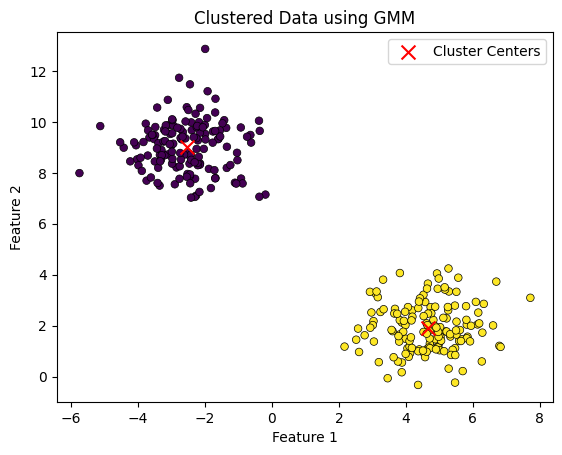

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

def generate_data(num_samples):
    # Generate data from a mixture of two blobs
    data, _ = make_blobs(n_samples=num_samples, centers=2, cluster_std=1.0, random_state=42)
    return data

def plot_data(data, title):
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def main():
    num_samples = 300
    data = generate_data(num_samples)
    plot_data(data, "Original Data")

    # Using scikit-learn Gaussian Mixture Model
    num_clusters = 2
    gmm = GaussianMixture(n_components=num_clusters, random_state=42)
    gmm.fit(data)

    # Get the final parameters from the GMM
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    print("Final means:")
    print(means)
    print("\nFinal covariances:")
    print(covariances)
    print("\nFinal weights:")
    print(weights)

    # Plot the data with the learned clusters
    plt.scatter(data[:, 0], data[:, 1], s=30, marker='o', edgecolors='k', linewidths=0.5, c=gmm.predict(data))
    plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
    plt.title("Clustered Data using GMM")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()



NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


K MEANS

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


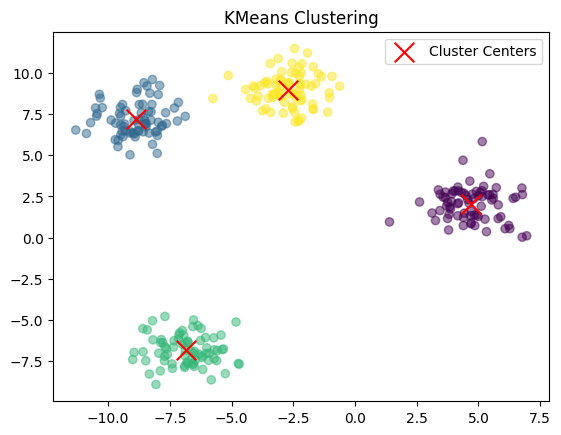

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for clustering
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Create a KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.legend()
plt.show()


APRIORI

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [['bread', 'milk', 'beer'],
                ['bread', 'diapers', 'eggs'],
                ['milk', 'diapers', 'beer', 'cola'],
                ['bread', 'milk', 'diapers', 'beer'],
                ['bread', 'milk', 'eggs']]

# Transform the transaction data to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Print the support for each frequent itemset
print("Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support']])

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the confidence for each association rule
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])



Frequent Itemsets:
                 itemsets  support
0                  (beer)      0.6
1                 (bread)      0.8
2               (diapers)      0.6
3                  (eggs)      0.4
4                  (milk)      0.8
5           (bread, beer)      0.4
6         (beer, diapers)      0.4
7            (beer, milk)      0.6
8        (bread, diapers)      0.4
9           (bread, eggs)      0.4
10          (bread, milk)      0.6
11        (diapers, milk)      0.4
12    (bread, beer, milk)      0.4
13  (beer, diapers, milk)      0.4

Association Rules:
       antecedents consequents  support  confidence
0           (beer)      (milk)      0.6        1.00
1           (milk)      (beer)      0.6        0.75
2           (eggs)     (bread)      0.4        1.00
3          (bread)      (milk)      0.6        0.75
4           (milk)     (bread)      0.6        0.75
5    (bread, beer)      (milk)      0.4        1.00
6  (beer, diapers)      (milk)      0.4        1.00
7  (diapers, milk)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


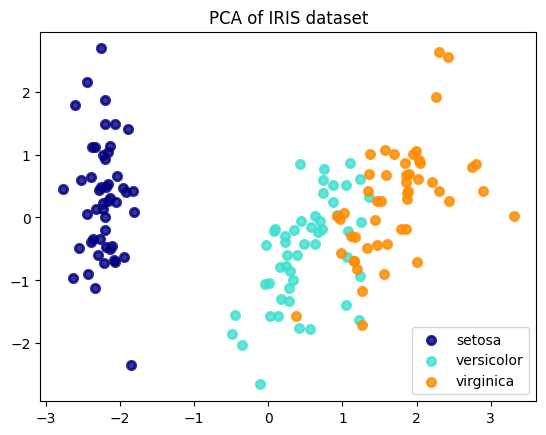

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()